# Lab 12: Misc Practice

In [1]:
options(repr.plot.width=6, repr.plot.height=4)

library(tidyverse)
library(stringr)
library(tidytext)
library(lubridate)
library(nycflights13)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



## Q1: News Headlines

We are going to look through headlines from ABC News. The following loads the dataset we will use.


In [7]:
headlines = read_csv('https://raw.githubusercontent.com/byoungwookjang/stats306_labs/master/lab13/abcnews_2017.csv', 
                     col_types=list(col_character(), col_character()))
load("afinn.RData")
sents = afinn
head(headlines)
head(sents)

publish_date,headline_text
20170101,1986 queensland cabinet documents released
20170101,actor william cristopher mash chaplain dead at 84
20170101,adelaide hip hop artist dreams becoming influential in australia
20170101,adelaide's new year's fireworks
20170101,adelaides new years fireworks
20170101,ambulances ferry injured to hospital istanbul nightclub attack


word,value
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


### 1.1

Create `headlines1` in which `publish_date` is converted the appropriate date format and there is an additional `id` variable that gives each headline a unique id number.

In [8]:
headlines1 = headlines %>% 
    mutate(publish_date=ymd(publish_date),
           id=row_number())

head(headlines1)

publish_date,headline_text,id
2017-01-01,1986 queensland cabinet documents released,1
2017-01-01,actor william cristopher mash chaplain dead at 84,2
2017-01-01,adelaide hip hop artist dreams becoming influential in australia,3
2017-01-01,adelaide's new year's fireworks,4
2017-01-01,adelaides new years fireworks,5
2017-01-01,ambulances ferry injured to hospital istanbul nightclub attack,6


### 1.2

Using `headlines1` and the `sents` dataset we loaded (which contains sentiment scores for each word), create `headlines2`, which adds a variable called `score` that contains the sentiment score for that word. Note that the sentiment score is simply the sum of the sentiment scores for each word in the headline.

In [45]:
headlines2 = headlines1 %>% unnest_tokens(word, headline_text) %>%
    left_join(sents) %>% 
    group_by(id) %>%
    summarize(score=sum(value, na.rm=TRUE)) %>%
    inner_join(headlines1)

head(headlines2)

# A tibble: 349,453 x 3
   publish_date    id word      
   <date>       <int> <chr>     
 1 2017-01-01       1 1986      
 2 2017-01-01       1 queensland
 3 2017-01-01       1 cabinet   
 4 2017-01-01       1 documents 
 5 2017-01-01       1 released  
 6 2017-01-01       2 actor     
 7 2017-01-01       2 william   
 8 2017-01-01       2 cristopher
 9 2017-01-01       2 mash      
10 2017-01-01       2 chaplain  
# … with 349,443 more rows


Joining, by = "word"


# A tibble: 349,453 x 4
   publish_date    id word       value
   <date>       <int> <chr>      <dbl>
 1 2017-01-01       1 1986          NA
 2 2017-01-01       1 queensland    NA
 3 2017-01-01       1 cabinet       NA
 4 2017-01-01       1 documents     NA
 5 2017-01-01       1 released      NA
 6 2017-01-01       2 actor         NA
 7 2017-01-01       2 william       NA
 8 2017-01-01       2 cristopher    NA
 9 2017-01-01       2 mash          NA
10 2017-01-01       2 chaplain      NA
# … with 349,443 more rows
# A tibble: 44,182 x 2
      id score
   <int> <dbl>
 1     1     0
 2     2    -3
 3     3     3
 4     4     0
 5     5     0
 6     6    -3
 7     7    -5
 8     8    -4
 9     9    -4
10    10     2
# … with 44,172 more rows


Joining, by = "id"


id,score,publish_date,headline_text
1,0,2017-01-01,1986 queensland cabinet documents released
2,-3,2017-01-01,actor william cristopher mash chaplain dead at 84
3,3,2017-01-01,adelaide hip hop artist dreams becoming influential in australia
4,0,2017-01-01,adelaide's new year's fireworks
5,0,2017-01-01,adelaides new years fireworks
6,-3,2017-01-01,ambulances ferry injured to hospital istanbul nightclub attack


### 1.3

Write a function `get_headlines` that takes a string `keyword` as an argument and returns a subset of `headlines2` with only rows where the headline contains the given `keyword`. The returned dataframe should contain an additional column titled `keyword` that contains the keyword provided to the function.

In [48]:
get_headlines = function(keyword) {
    keyword = tolower(keyword)
    result = headlines2 %>% 
        filter(str_detect(headline_text, keyword)) %>%
        mutate(keyword=keyword)
    return(result)
}

head(get_headlines('Trump'))

id,score,publish_date,headline_text,keyword
22,-2,2017-01-01,donald trump remains sceptical russia was behind hacking,trump
83,0,2017-01-02,donald trump indonesian business partner wants run for president,trump
172,-1,2017-01-03,donald trump rebecca ferguson inauguration strange fruit,trump
261,0,2017-01-03,will president trump be the most pro israel president ever,trump
282,0,2017-01-04,bill and hillary clinton to attend donald trump inauguration,trump
360,0,2017-01-04,republican led us congress trump era groundwork,trump


### 1.4

Using `get_headlines`, create a dataframe `headlines4` which, for each country in `country_interest`, contains the headlines associated with that country. The result should be a single dataframe. You should be able to do this with a one-liner.

In [56]:
country_interest = c('china', 'india', 'russia', 'syria', 'indonesia',
                     'japan', 'israel', 'iraq', 'iran', 'philippines',
                     'united states', 'france')

headlines4 = map_dfr(country_interest, get_headlines)
# headlines4 = reduce(map(country_interest, get_headlines), rbind)

head(headlines4)

id,score,publish_date,headline_text,keyword
193,0,2017-01-03,human hair and rocket launchers now cheaper to export to china,china
388,-4,2017-01-04,two wounded one dead after gun rampage in china,china
424,0,2017-01-05,china to spend $493 billion on renewable fuel by 2020,china
434,-4,2017-01-05,economists fear official uschina trade war as yuan,china
531,2,2017-01-05,wine exporters to benefit from further china tariff reduction,china
554,0,2017-01-06,china harbin ice festival begins with spectacular sculptures,china


### 1.5

Do whatever data management and plotting you need to replicate the following plot using `headlines4`. 

If you want to match the colors exactly, the colors I use for the endpoints of my scale are `muted('red')` and `muted('green')`.

![stats306_lab13_prob3.png]

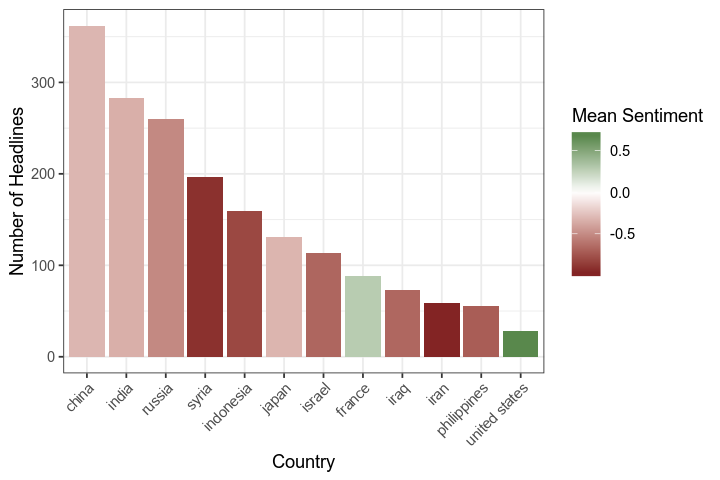

In [57]:
res = headlines4 %>% group_by(keyword) %>% 
      summarize(n=n(), mean_score=mean(score))

ggplot(data=res, aes(x=reorder(keyword, -n), y=n, fill=mean_score)) + 
    geom_bar(stat='identity') + 
    scale_fill_gradient2(low=muted('red'), mid='white', 
                         high=muted('green'), midpoint=0) + 
    labs(x='Country', y='Number of Headlines', fill='Mean Sentiment') +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1))

In [44]:
require(forcats)
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


In [49]:
# a) What is the median reported age for Jewish respondents?
gss_data = gss_cat
levels(gss_data$relig)
gss_data %>% filter(relig == 'Jewish') %>% summarize(median(age, na.rm=T))

[1] "No answer"               "Don't know"             
 [3] "Inter-nondenominational" "Native american"        
 [5] "Christian"               "Orthodox-christian"     
 [7] "Moslem/islam"            "Other eastern"          
 [9] "Hinduism"                "Buddhism"               
[11] "Other"                   "None"                   
[13] "Jewish"                  "Catholic"               
[15] "Protestant"              "Not applicable"

"median(age, na.rm = T)"
53


#### b) A millennial is defined to be someone who was 18 or younger in the year 2000. Are the millennials in this survey more likely to identify as atheist (relig =='None') compared to earlier generations?

In [54]:
unique(gss_data$year)
gss_data %>% 
    filter(!is.na(age)) %>%
    mutate(age_2000 = age - (year-2000),
           millenial = ifelse(age_2000 <= 18, 
                              'millenial', 'not millenial')) %>%
    group_by(millenial) %>%
    summarize(atheist = sum(relig=='None')/n())
            

[1] 2000 2002 2004 2006 2008 2010 2012 2014

millenial,atheist
<chr>,<dbl>
millenial,0.2920228
not millenial,0.1501995


### c) Consider the following two possible models relating age and hours spent watching TV:

* lm(age~tvhours)
* lm(age~ poly(tvhours, 2))

Warning message:
“Removed 38 rows containing missing values (geom_point).”

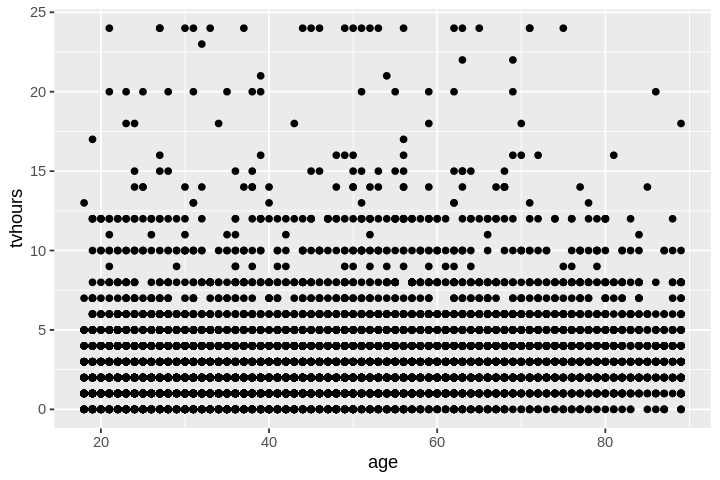

In [69]:
require(stats)
require(modelr)
gss_data = gss_cat %>% filter(!is.na(tvhours))
ggplot(gss_data) + geom_point(mapping=aes(x=age, y=tvhours))

In [75]:
tv_model1 = lm(age ~ tvhours, data = gss_data)
summary(tv_model1)


Call:
lm(formula = age ~ tvhours, data = gss_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.075 -14.181  -1.346  11.875  44.598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.40171    0.24700  179.76   <2e-16 ***
tvhours      0.94471    0.06254   15.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.22 on 11297 degrees of freedom
  (38 observations deleted due to missingness)
Multiple R-squared:  0.0198,	Adjusted R-squared:  0.01971 
F-statistic: 228.2 on 1 and 11297 DF,  p-value: < 2.2e-16


In [76]:
tv_model2 = lm(age ~ poly(tvhours, 2), data = gss_data)
summary(tv_model2)


Call:
lm(formula = age ~ poly(tvhours, 2), data = gss_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.739 -13.974  -1.111  11.968  47.263 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         47.2182     0.1608  293.64   <2e-16 ***
poly(tvhours, 2)1  260.4601    17.1040   15.23   <2e-16 ***
poly(tvhours, 2)2 -219.2817    17.1024  -12.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.09 on 11296 degrees of freedom
  (38 observations deleted due to missingness)
Multiple R-squared:  0.03386,	Adjusted R-squared:  0.03369 
F-statistic: 197.9 on 2 and 11296 DF,  p-value: < 2.2e-16


### Regression problems

In [24]:
head(diamonds)
# dm = diamonds[sample(1:nrow(diamonds), 2000),]
dm = diamonds %>% group_by(cut) %>% sample_n(500) %>% ungroup

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


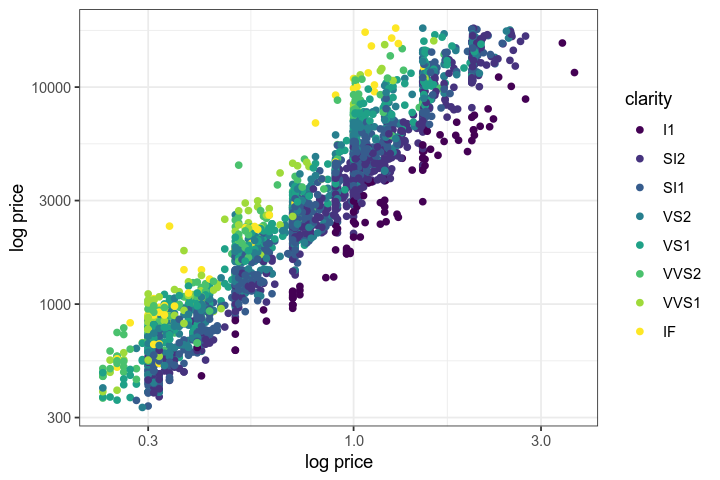

In [25]:
ggplot(dm) + geom_point(mapping=aes(x=carat, y=price, color=clarity)) + 
    scale_x_log10() + scale_y_log10() + theme_bw() + ylab('log price') + xlab('log price')

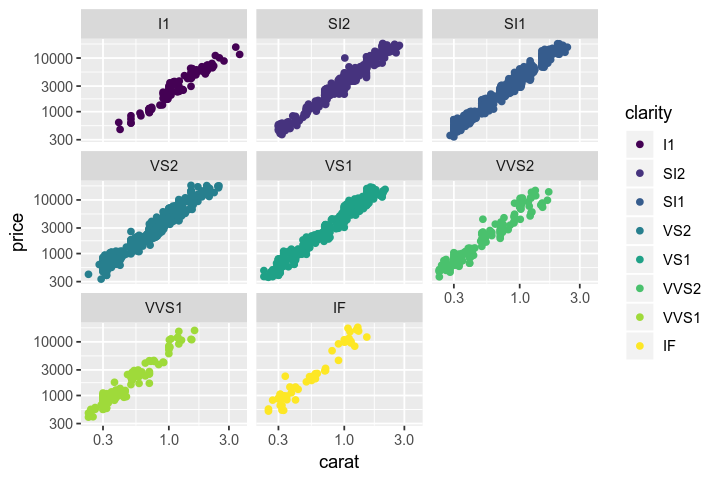

In [26]:
ggplot(dm) + geom_point(mapping=aes(x=carat, y=price, color=clarity)) + 
    scale_x_log10() + scale_y_log10() + facet_wrap( ~ clarity)

### Should you use interaction or additive?
Which model should you use?
* log(price) ~ log(carat) * clarity
* log(price) ~ log(carat) + clarity

In [39]:
dm$clarity = factor(dm$clarity , ordered = FALSE )

In [40]:
summary(lm(I(log(price)) ~ I(log(carat))+clarity, data = dm))


Call:
lm(formula = I(log(price)) ~ I(log(carat)) + clarity, data = dm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71149 -0.13355  0.01003  0.13507  0.98414 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.65722    0.02001  382.62   <2e-16 ***
I(log(carat))  1.79932    0.00766  234.90   <2e-16 ***
claritySI2     0.55217    0.02193   25.18   <2e-16 ***
claritySI1     0.69298    0.02167   31.98   <2e-16 ***
clarityVS2     0.83829    0.02214   37.86   <2e-16 ***
clarityVS1     0.89828    0.02284   39.32   <2e-16 ***
clarityVVS2    1.06203    0.02545   41.73   <2e-16 ***
clarityVVS1    1.12912    0.02746   41.11   <2e-16 ***
clarityIF      1.23839    0.03380   36.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1989 on 2491 degrees of freedom
Multiple R-squared:  0.959,	Adjusted R-squared:  0.9588 
F-statistic:  7275 on 8 and 2491 DF,  p-value: < 2.2e-16


In [51]:
summary(lm(I(log(price)) ~ I(log(carat))*clarity, data = dm))


Call:
lm(formula = I(log(price)) ~ I(log(carat)) * clarity, data = dm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72428 -0.13475  0.00976  0.13875  0.98427 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.67603    0.02066 371.617  < 2e-16 ***
I(log(carat))              1.65564    0.04303  38.475  < 2e-16 ***
claritySI2                 0.53342    0.02250  23.710  < 2e-16 ***
claritySI1                 0.68288    0.02243  30.439  < 2e-16 ***
clarityVS2                 0.81577    0.02311  35.302  < 2e-16 ***
clarityVS1                 0.87277    0.02417  36.107  < 2e-16 ***
clarityVVS2                1.03301    0.03115  33.159  < 2e-16 ***
clarityVVS1                1.13346    0.04025  28.164  < 2e-16 ***
clarityIF                  1.35112    0.04642  29.109  < 2e-16 ***
I(log(carat)):claritySI2   0.12545    0.04677   2.682 0.007366 ** 
I(log(carat)):claritySI1   0.17690    0.04570   3.871 0.000111 ***
I(log